# Topic extractor for Video Transcripts

<b>Contents</b>
1. Introduction
2. Import Packages
3. Get data
4. Pre process data
5. Create the Dictionary and Corpus needed for Topic Modeling
6. Creating Bigram and Trigram 
7. Building the Topic Model
8. LDA<br>
      a. LDA - bow unigram<br>
      b. LDA - bow bigram<br>
      c. LDA - bow trigram<br>
      d. LDA - bow tfidf<br>
   Compute Model Perplexity and Coherence Score<br>
   Find optimal number of topics<br>
   Visualize the topics-keywords
9. LSA - tfidf
10. NMF - tfidf
11. Analysation
12. Conclusion

<b>Introduction<br>
    <br>
<b>Topic Modeling is a technique to extract the hidden topics from large volumes of text. LDA, LSA & NMF are excellent implementations for the same. The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics. Here we try to attempt to tackle these problems.

<b>Import packages

In [1]:
# import all necessary files
import import_ipynb
from src.get_data import *
from src.topic_modeling import *
from src.preprocessing import *
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

importing Jupyter notebook from C:\Users\Dell\Desktop\Imarticus-learning\Capstone\DL-capstone\NLP\TopicExtraction\src\get_data.ipynb
importing Jupyter notebook from C:\Users\Dell\Desktop\Imarticus-learning\Capstone\DL-capstone\NLP\TopicExtraction\src\topic_modeling.ipynb
importing Jupyter notebook from C:\Users\Dell\Desktop\Imarticus-learning\Capstone\DL-capstone\NLP\TopicExtraction\src\preprocessing.ipynb
importing Jupyter notebook from C:\Users\Dell\Desktop\Imarticus-learning\Capstone\DL-capstone\NLP\TopicExtraction\src\stopwords.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<string>:76: DeprecationWarning: invalid escape sequence \S
<string>:79: DeprecationWarning: invalid escape sequence \s
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\Dell\anaconda3\lib\site-packages\

C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:513: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool,
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:555: DeprecationWarning: `np.object` is a deprecated

<b> Get data

In [2]:
# set dataset name
df_name = "MUSE"

In [3]:
# extract dataset
X_train, Y_train, X_test, Y_test = get_data(data_set=df_name, get_test_data="YES")

<b>Pre processing 

In [4]:
# preprocess the data
processed_train_text, processed_train_label, train_vocabulary, train_raw_tokens = do_preprocessing(
    X_train, Y_train, dataset=df_name, dataset_type='train')

5317
5317


<b>Dictionary of Data</b>

The basic steps of this approach are following. First, take the corpus which can be collection of words, sentences or texts. Then, for each given word, return the corresponding integer representation by looking it up in the dictionary.

In [5]:
#create dictionary
dictionary = corpora.Dictionary(processed_train_text)

<b>BOW corpus</b>

creating bow model based upon the supplied dictionary.

In [6]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_train_text]
# bow_corpus

<b>Creating bigrams & Trigrams</b>

We can explore some word associations to see which words often show up together. Lets investigate combinations of two words or three words, i.e., Bigrams/Trigrams.

In [7]:
bigrams_text = make_bigrams(processed_train_text)
trigrams_text = make_bigrams(processed_train_text)

In [8]:
bigrams_dictionary = corpora.Dictionary(bigrams_text)
trigrams_dictionary = corpora.Dictionary(trigrams_text)

In [9]:
bigrams_corpus = [dictionary.doc2bow(doc) for doc in bigrams_text]
trigrams_corpus = [dictionary.doc2bow(doc) for doc in trigrams_text]

# <b>Building the Topic Model :</b>

# LDA

<b>BOW Models - Unigrams

In [11]:
bow_model_list, bow_coherence_values = select_lda_topics(bow_corpus, processed_train_text, dictionary, range(3, 15, 1))
bow_coherence_values

[0.3846901689081334,
 0.38816280355307603,
 0.36017989654150556,
 0.3439748161553739,
 0.3714204560922049,
 0.4057816929094664,
 0.399226652011597,
 0.4067524865081474,
 0.44136138058745633,
 0.43258107880121327,
 0.41536903479109905,
 0.4151806005124973]

<b>Find the optimal number of topics

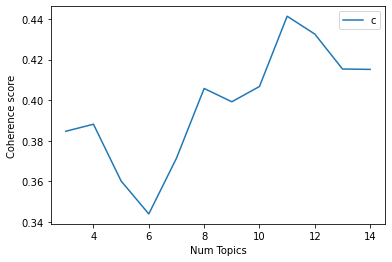

In [12]:
# Show graph
x = range(3, 15, 1)
plt.plot(x, bow_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<b>Compute Model Perplexity and Coherence Score

In [13]:
bow_vis, bow_lda_model = lda_modelling(bow_corpus, processed_train_text, dictionary, noof_topics=11)


Perplexity:  -8.621706031212916

Coherence Score:  0.44136138058745633


In [14]:
bow_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.136602  0.315542       1        1  20.372981
8     -0.304448 -0.225928       2        1  15.592714
10    -0.198524  0.130243       3        1  13.976158
3      0.086781 -0.002686       4        1   9.814107
5     -0.035431 -0.165711       5        1   8.996738
7      0.075458  0.006518       6        1   8.943644
9      0.102528 -0.011416       7        1   6.132654
0      0.104972 -0.012562       8        1   5.995154
6      0.104073 -0.012318       9        1   4.551945
2      0.101899 -0.011308      10        1   3.422172
1      0.099293 -0.010374      11        1   2.201733, topic_info=          Term         Freq        Total Category  logprob  loglift
0          bmw   907.000000   907.000000  Default  30.0000  30.0000
169      sport   749.000000   749.000000  Default  29.0000  29.0000
242      wheel  1014.000000  1014.000000  Default  28.0000  28.0000
172       audi   607.000000   607.000000  Default  27.0000  27.0000
156       seat   713.000000   713.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
4341       fee     4.679177     5.644604  Topic11  -5.4281   3.6283
2040     speak     4.225645     5.135093  Topic11  -5.5301   3.6210
481   motorway     4.221864     5.131220  Topic11  -5.5309   3.6209
893        tag     4.108054     5.017748  Topic11  -5.5583   3.6159
1124     blast     3.674555     4.584182  Topic11  -5.6698   3.5947

[372 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
304       5  0.987183    accelerate
972       5  0.993826  acceleration
512       2  0.994215         adult
567      11  0.922039        afford
352       7  0.998003           air
...     ...       ...           ...
243       1  0.945410         world
243       2  0.046687         world
36        6  0.993266          year
109       1  0.989251           yes
3544     10  0.952515     yesterday

[349 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 4, 6, 8, 10, 1, 7, 3, 2])

In [15]:
bow_vis, bow_lda_model = lda_modelling(bow_corpus, processed_train_text, dictionary, noof_topics=8)


Perplexity:  -8.059035857196546

Coherence Score:  0.4057816929094664


In [16]:
bow_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.192192  0.322707       1        1  23.668774
5      0.331231  0.134068       2        1  17.846987
3     -0.129173  0.003431       3        1  15.504032
1     -0.078883 -0.210120       4        1  12.288990
4     -0.032790 -0.072686       5        1   9.370076
6      0.134537 -0.025578       6        1   8.730459
7     -0.018444 -0.089301       7        1   7.801089
2     -0.014286 -0.062521       8        1   4.789592, topic_info=             Term        Freq       Total Category  logprob  loglift
242         wheel  976.000000  976.000000  Default  30.0000  30.0000
0             bmw  930.000000  930.000000  Default  29.0000  29.0000
156          seat  818.000000  818.000000  Default  28.0000  28.0000
17          power  528.000000  528.000000  Default  27.0000  27.0000
169         sport  696.000000  696.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2812    clearance   13.804470   14.629534   Topic8  -5.1234   2.9807
1023  predecessor   13.788934   14.613427   Topic8  -5.1246   2.9807
463        dollar   13.685210   14.509955   Topic8  -5.1321   2.9802
610          wind   13.201381   14.026390   Topic8  -5.1681   2.9781
686         heart   13.003143   13.829232   Topic8  -5.1832   2.9771

[283 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1405      8  0.968748       ability
304       7  0.991339    accelerate
972       2  0.978388  acceleration
512       1  0.988971         adult
352       3  0.995705           air
...     ...       ...           ...
610       8  0.926824          wind
1035      3  0.989953          word
243       2  0.992185         world
36        8  0.996487          year
109       2  0.992187           yes

[262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 4, 2, 5, 7, 8, 3])

In [17]:
bow_vis, bow_lda_model = lda_modelling(bow_corpus, processed_train_text, dictionary, noof_topics=5)


Perplexity:  -7.859085413299386

Coherence Score:  0.36017989654150556


In [18]:
bow_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.142198 -0.284975       1        1  24.123354
3     -0.042564  0.200920       2        1  21.077298
4     -0.157278  0.146210       3        1  20.499606
2      0.317884 -0.025445       4        1  18.989739
1      0.024156 -0.036710       5        1  15.310004, topic_info=             Term        Freq       Total Category  logprob  loglift
242         wheel  876.000000  876.000000  Default  30.0000  30.0000
156          seat  752.000000  752.000000  Default  29.0000  29.0000
169         sport  629.000000  629.000000  Default  28.0000  28.0000
0             bmw  949.000000  949.000000  Default  27.0000  27.0000
17          power  519.000000  519.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1207       figure   39.864484   40.630761   Topic5  -5.2250   1.8576
778         water   39.290848   40.065034   Topic5  -5.2395   1.8572
2722       number   37.471064   38.230509   Topic5  -5.2869   1.8566
430   performance  319.705777  326.385685   Topic5  -3.1431   1.8560
97           talk   61.852227   64.751302   Topic5  -4.7857   1.8309

[198 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
972       4  0.989877  acceleration
512       1  0.981897         adult
512       3  0.009441         adult
352       2  0.995566           air
352       3  0.004464           air
...     ...       ...           ...
242       4  0.999175         wheel
1035      2  0.992929          word
243       3  0.993861         world
36        5  0.995068          year
109       3  0.993946           yes

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

<b>BOW Models - Bigrams

In [19]:
bigrams_model_list, bigrams_coherence_values = select_lda_topics(bigrams_corpus, bigrams_text, bigrams_dictionary, range(3, 15, 1))
bigrams_coherence_values

[0.632765425297856,
 0.6734226133324328,
 0.6815010911486751,
 0.672944539044376,
 0.6685734679117034,
 0.6665367813187526,
 0.6807276842356582,
 0.6737369763875363,
 0.6694510344058747,
 0.6690943687150664,
 0.671001637408907,
 0.6592064997531729]

<b>Find the optimal number of topics

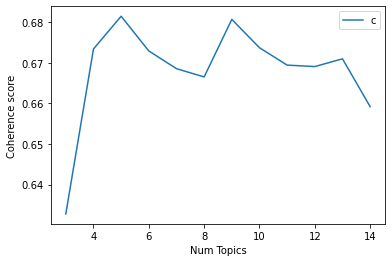

In [20]:
# Show graph
x = range(3, 15, 1)
plt.plot(x, bigrams_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
bigram_vis, bigram_lda_model = lda_modelling(bigrams_corpus, bigrams_text, bigrams_dictionary, noof_topics=5)


Perplexity:  -7.8618230559092295

Coherence Score:  0.6815010911486751


In [22]:
bigram_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.257916 -0.216022       1        1  27.763196
0      0.136120  0.288359       2        1  23.803664
1     -0.128193 -0.097108       3        1  17.708170
4     -0.228710 -0.025761       4        1  16.952847
2     -0.037133  0.050531       5        1  13.772122, topic_info=            Term        Freq       Total Category  logprob  loglift
0            bmw  971.000000  971.000000  Default  30.0000  30.0000
169       beacon  680.000000  680.000000  Default  29.0000  29.0000
242     headroom  932.000000  932.000000  Default  28.0000  28.0000
156         belt  691.000000  691.000000  Default  27.0000  27.0000
17         power  511.000000  511.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
814      respond   41.770225   42.539582   Topic5  -5.0260   1.9643
501   proportion   39.441043   40.200434   Topic5  -5.0834   1.9635
1066      hiding   39.214371   39.970387   Topic5  -5.0891   1.9634
1703    variable   36.774379   37.519600   Topic5  -5.1534   1.9625
5243      oleson   39.125599   54.231441   Topic5  -5.0914   1.6560

[198 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
388       2  0.991680       add_deal
507       3  0.987354          adult
235       3  0.980568         affect
972       4  0.984330            age
345       2  0.984324            air
...     ...       ...            ...
232       2  0.994459  wallace_phone
1545      5  0.984659           week
471       4  0.987534         weight
792       1  0.994684         wonder
36        5  0.995500           year

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

<b>BOW Models - Trigrams

In [24]:
trigrams_model_list, trigrams_coherence_values = select_lda_topics(trigrams_corpus, trigrams_text, trigrams_dictionary, range(3, 15, 1))
trigrams_coherence_values

[0.632765425297856,
 0.6734226133324328,
 0.6815010911486751,
 0.672944539044376,
 0.6685734679117034,
 0.6665367813187526,
 0.6807276842356582,
 0.6737369763875363,
 0.6694510344058747,
 0.6690943687150664,
 0.671001637408907,
 0.6592064997531729]

<b>LDA with tfidf

In [25]:
#creating tfifd corpus
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [26]:
tfidf_lda_vis, tfidf_lda_model = lda_modelling(corpus_tfidf, processed_train_text, dictionary, noof_topics=5)


Perplexity:  -9.020345783850354

Coherence Score:  0.4078840811306107


In [27]:
tfidf_lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.245979 -0.021805       1        1  39.903403
4     -0.091641 -0.187433       2        1  26.793458
1     -0.067068  0.111458       3        1  15.267368
0     -0.048697  0.055930       4        1  12.368727
2     -0.038572  0.041850       5        1   5.667044, topic_info=         Term        Freq       Total Category  logprob  loglift
156      seat   88.000000   88.000000  Default  30.0000  30.0000
242     wheel  128.000000  128.000000  Default  29.0000  29.0000
0         bmw  119.000000  119.000000  Default  28.0000  28.0000
528      inch   80.000000   80.000000  Default  27.0000  27.0000
167   package   35.000000   35.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
463    dollar    2.123993    2.767146   Topic5  -5.8658   2.6060
738      read    2.022316    2.649865   Topic5  -5.9149   2.6002
2039  massage    2.740132    3.602375   Topic5  -5.6111   2.5969
1570  surface    1.856906    2.488929   Topic5  -6.0002   2.5776
664   mileage    1.869828    2.567314   Topic5  -5.9933   2.5535

[186 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1405      5  0.862899     ability
146       5  0.901566  adjustment
512       3  0.993981       adult
352       1  0.976186         air
81        3  0.917290        area
...     ...       ...         ...
2316      3  0.936161       wagon
388       4  0.916773         way
478       2  0.966315      weight
242       1  0.999813       wheel
36        3  0.993343        year

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

In [28]:
tfidf_lda_vis, tfidf_lda_model = lda_modelling(corpus_tfidf, processed_train_text, dictionary, noof_topics=4)
tfidf_lda_vis


Perplexity:  -8.764215296395935

Coherence Score:  0.3759966081365692


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.183468  0.059521       1        1  48.108210
3      0.133196  0.120389       2        1  38.055305
1      0.034046 -0.123232       3        1  10.073640
2      0.016225 -0.056679       4        1   3.762846, topic_info=             Term       Freq      Total Category  logprob  loglift
172          audi  75.000000  75.000000  Default  30.0000  30.0000
1            cost  28.000000  28.000000  Default  29.0000  29.0000
430   performance  70.000000  70.000000  Default  28.0000  28.0000
169         sport  98.000000  98.000000  Default  27.0000  27.0000
371         turbo  25.000000  25.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
380          dart   0.313468  12.471246   Topic4  -7.3697  -0.4035
5246       canyon   0.311939  12.720950   Topic4  -7.3746  -0.4282
4765        prius   0.328563  15.657564   Topic4  -7.3226  -0.5840
46         buying   0.293059  13.291785   Topic4  -7.4370  -0.5345
892         price   0.372448  54.304568   Topic4  -7.1973  -1.7023

[220 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
304       1  0.100585    accelerate
304       2  0.100585    accelerate
304       3  0.804677    accelerate
972       3  0.979610  acceleration
512       1  0.994934         adult
...     ...       ...           ...
939       1  0.988470       vehicle
35        1  0.986553       version
79        2  0.993740         video
242       1  0.274542         wheel
242       2  0.721653         wheel

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

# LSA

In [30]:
# get Tfidf of words
vect, tfidf_text = get_tfidf(processed_train_text)

In [31]:
lsa_model, lsa_tops = lsa_modelling(tfidf_text, 5)

In [33]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
seat wheel sport engine bmw control power audi class thing 

Topic 1: 
seat space door passenger boot storage head practicality floor problem 

Topic 2: 
engine power seat diesel mile turbo foot speed second petrol 

Topic 3: 
class bmw engine mercedes video mile audi siri diesel boot 

Topic 4: 
bmw sport guy seat siri comfort eye mile performance vehicle 



# NMF

In [38]:
nmf_model = nmf_modelling(tfidf_text, 5)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [39]:
for index,topic in enumerate(nmf_model.components_):
    print(f'TOPIC - #{index}')
    print([vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

TOPIC - #0
['gearbox', 'model', 'air', 'inch', 'button', 'corner', 'comfort', 'speed', 'power', 'thing', 'audi', 'suspension', 'control', 'sport', 'wheel']


TOPIC - #1
['rest', 'button', 'feature', 'practicality', 'point', 'floor', 'storage', 'problem', 'head', 'boot', 'passenger', 'foot', 'space', 'door', 'seat']


TOPIC - #2
['transmission', 'gearbox', 'sound', 'performance', 'hour', 'cylinder', 'petrol', 'second', 'foot', 'speed', 'turbo', 'diesel', 'mile', 'power', 'engine']


TOPIC - #3
['channel', 'year', 'watch', 'audi', 'luxury', 'feel', 'quality', 'price', 'click', 'design', 'boot', 'thing', 'video', 'mercedes', 'class']


TOPIC - #4
['channel', 'phone', 'feature', 'start', 'year', 'version', 'eye', 'design', 'price', 'vehicle', 'audi', 'video', 'siri', 'guy', 'bmw']




<b>Analysis:<br>
 Interpretation is every users individual perspective. This is mine. It can look different to others.<br>
 
LSA & NMF has some overlapping words- so we can say this model can be imporoved more by performing more preprocessing & also we can try with diff no of topics<br>
    
LDA- we have coherence score & perplexity evaluation metrics which helps a lot in deciding the topics. And among the variants such as LDA-bow, 
LDA-bigrams, LDA-tfidf, coherence score of LDA bigrams was better.
    
Thus we can get better insights with LDA -bigrams in this paper

<b> Conclusion<br></br>

We started with understanding what topic modeling can do. We built basic topic models using Gensim’s LDA and visualize the topics using pyLDAvis. 
We saw how to find the optimal number of topics using coherence scores and how you can come to a logical understanding of how to choose the 
optimal model. Then we built LSA & NMF implementation & analysed the topics

We have generated insights in a more meaningful way.

Thank You.